# DV Laboratory Part B - Exercise 3

### Develop a k-nearest neighbours classifier model based on the Iris dataset. Make use of visualization tools such as scatter plots to visualize the data.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x_fields = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

X = df[x_fields]
y = df["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = knn.predict(X_test)


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy * 100} %")
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test) 
y_pred_encoded = label_encoder.transform(y_pred)

Accuracy = 100.0 %


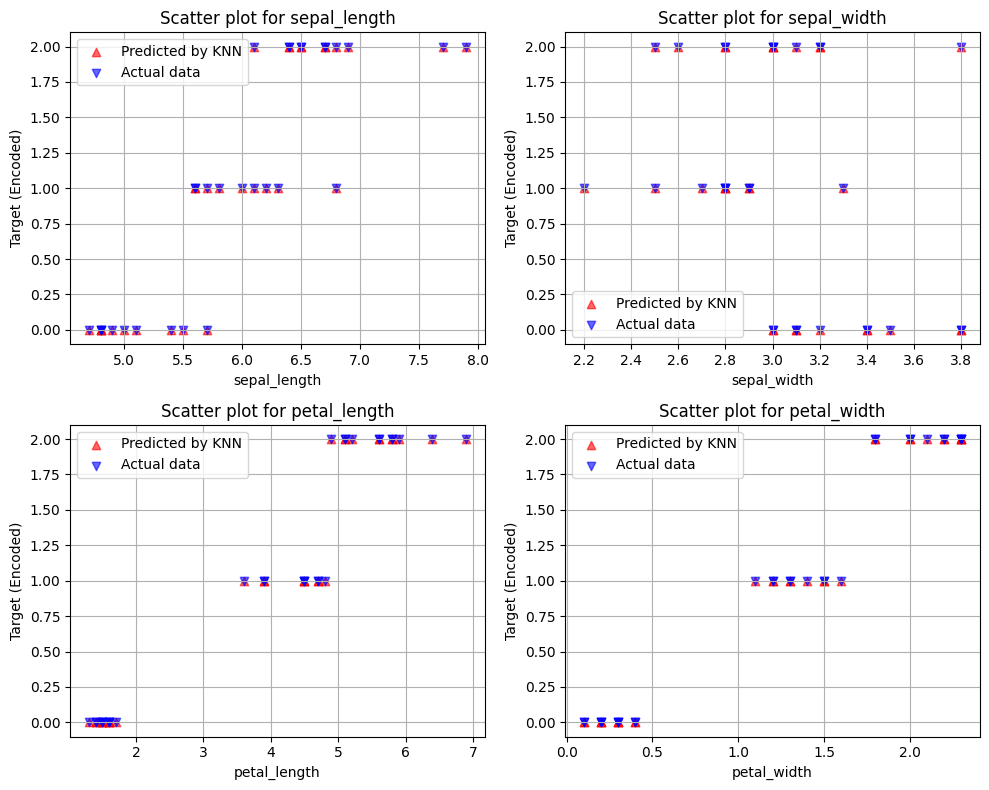

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes = axes.flatten()

for i, field in enumerate(x_fields):
    axes[i].scatter(X_test[field], y_pred_encoded, color="red", marker="^", label="Predicted by KNN", alpha=0.6)
    axes[i].scatter(X_test[field], y_test_encoded, color="blue", marker="v", label="Actual data", alpha=0.6)
    axes[i].set_title(f"Scatter plot for {field}")
    axes[i].set_xlabel(f"{field}")
    axes[i].set_ylabel("Target (Encoded)")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()

plt.show()